In [1]:
from sklearn import preprocessing
import numpy as np
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
# create cluster heatmaps
df = pd.read_table('new_all.csv', sep = ',')
df

,name,class,TG,CA,AG,CT,GA,TC,AC,GT,CC,GG,AA,TT,AT,TA,CG,GC
0,Acinonyx_jubatus,Mammals,1.27,1.27,1.22,1.20,1.08,1.09,0.85,0.84,0.84,0.84,0.79,0.79,0.85,0.56,0.44,0.96
1,Ailuropoda_melanoleuca,Mammals,1.26,1.27,1.23,1.21,1.08,1.09,0.85,0.84,0.84,0.84,0.79,0.79,0.85,0.55,0.44,0.97
2,Artibeus_jamaicensis,Mammals,1.29,1.29,1.23,1.22,1.07,1.08,0.86,0.85,0.83,0.83,0.79,0.79,0.83,0.54,0.45,0.97
3,Arvicanthis_niloticus,Mammals,1.31,1.32,1.26,1.24,1.08,1.09,0.86,0.85,0.84,0.83,0.77,0.77,0.85,0.56,0.37,0.98
4,Arvicola_amphibius,Mammals,1.31,1.31,1.25,1.24,1.08,1.09,0.86,0.85,0.84,0.83,0.77,0.77,0.84,0.55,0.39,0.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,Thalassiosira_pseudonana_CCMP1335,Protozoa,1.23,1.23,1.00,1.00,1.20,1.20,0.96,0.96,0.76,0.75,0.82,0.82,1.01,0.57,0.84,0.91
1108,Theileria_annulata,Protozoa,1.12,1.12,1.01,1.00,1.10,1.11,0.95,0.95,0.92,0.91,0.80,0.79,0.93,0.78,0.67,0.78
1109,Theileria_equi_strain_WA,Protozoa,1.14,1.14,1.03,1.02,1.10,1.10,0.90,0.90,0.89,0.89,0.78,0.78,0.97,0.78,0.70,0.92
1110,Theileria_parva_strain_Muguga,Protozoa,1.12,1.12,1.01,1.01,1.10,1.10,0.97,0.96,0.91,0.91,0.80,0.80,0.91,0.77,0.69,0.77


In [3]:
species = df['name']
grouping = df['class']

In [4]:
non_numeric =['name', 'class']
species = df['name']
non_numeric

['name', 'class']

In [5]:
df_numeric = df.drop(non_numeric, axis = 1)
df_numeric

,TG,CA,AG,CT,GA,TC,AC,GT,CC,GG,AA,TT,AT,TA,CG,GC
0,1.27,1.27,1.22,1.20,1.08,1.09,0.85,0.84,0.84,0.84,0.79,0.79,0.85,0.56,0.44,0.96
1,1.26,1.27,1.23,1.21,1.08,1.09,0.85,0.84,0.84,0.84,0.79,0.79,0.85,0.55,0.44,0.97
2,1.29,1.29,1.23,1.22,1.07,1.08,0.86,0.85,0.83,0.83,0.79,0.79,0.83,0.54,0.45,0.97
3,1.31,1.32,1.26,1.24,1.08,1.09,0.86,0.85,0.84,0.83,0.77,0.77,0.85,0.56,0.37,0.98
4,1.31,1.31,1.25,1.24,1.08,1.09,0.86,0.85,0.84,0.83,0.77,0.77,0.84,0.55,0.39,0.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,1.23,1.23,1.00,1.00,1.20,1.20,0.96,0.96,0.76,0.75,0.82,0.82,1.01,0.57,0.84,0.91
1108,1.12,1.12,1.01,1.00,1.10,1.11,0.95,0.95,0.92,0.91,0.80,0.79,0.93,0.78,0.67,0.78
1109,1.14,1.14,1.03,1.02,1.10,1.10,0.90,0.90,0.89,0.89,0.78,0.78,0.97,0.78,0.70,0.92
1110,1.12,1.12,1.01,1.01,1.10,1.10,0.97,0.96,0.91,0.91,0.80,0.80,0.91,0.77,0.69,0.77


In [6]:
lut = dict(zip(grouping.unique(), [ '#ffcce6', '#ff1a8c','#ffff99' , '#ffe6f2', '#00ffff',    '#99e600','#e6e600', '#b3b300','#003300', '#666633', '#ff8000','#804000','#ffe6cc','#993300','#996600',  '#331a00', '#ff8000','#cc00cc','#ff1a66', '#cc00cc', '#4d0039', '#00ffff', '#ff8000','#ff4d4d','#D033FF' ,'#a0522d', '#999900','#b3ccff'])) #, , , , , '#ffff33']))
lut

# pink and purple fungi = aschi , basi and other = #

# '#009933', '#aaff80' , '#666633'   plants= 'Eudicotyledons': '#009933', 'Liliosida': '#aaff80', 'Chlorophyta': '#666633'

#brown and orange = insects

##ffb366','#ff8000','#804000','#ffe6cc','#993300','#996600',

### protozoa  



{'Mammals': '#ffcce6',
 'Birds': '#ff1a8c',
 'Reptiles': '#ffff99',
 'Amphibians': '#ffe6f2',
 'Fishes': '#00ffff',
 'Plants': '#99e600',
 'Chlorophyta': '#e6e600',
 'Invertebrates': '#b3b300',
 'Fungi': '#003300',
 'Protozoa': '#666633'}

In [7]:
row_colors = grouping.map(lut)
row_colors

0       #ffcce6
1       #ffcce6
2       #ffcce6
3       #ffcce6
4       #ffcce6
         ...   
1107    #666633
1108    #666633
1109    #666633
1110    #666633
1111    #666633
Name: class, Length: 1112, dtype: object

/home/nisha/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 4320x3384 with 0 Axes>

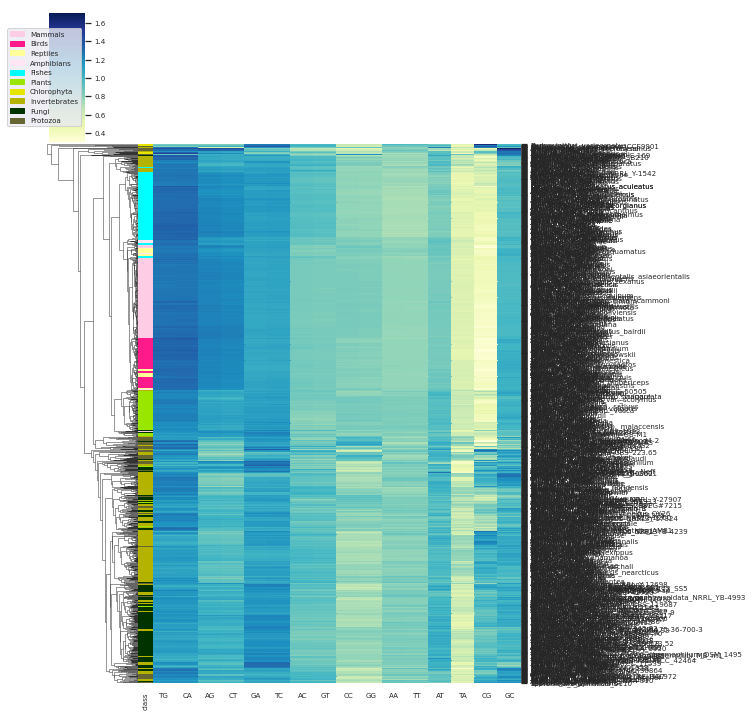

In [8]:
import matplotlib.patches as mpatches
import seaborn as sns



legend_patch = []

for x in lut.keys():
    legend_patch.append(mpatches.Patch(color=lut[x], hatch='o', label=x))
sns.set(font_scale = 0.65)

fig = plt.figure(figsize =(60,47))
sns.color_palette()
ax = sns.clustermap(df_numeric, cmap="YlGnBu", col_cluster = False,row_colors = row_colors, yticklabels=species)

plt.legend(handles=legend_patch,loc='right')
plt.savefig('fungicopy1.jpg')